# Movies Dataset

Installing and importing libraries

In [ ]:
!pip install vega_datasets pandas matplotlib seaborn


Loading the Movies Dataset

In [ ]:
from vega_datasets import data
import pandas as pd

# Load the movies dataset
movies_data = data.movies()

# Display the first few rows of the dataset
movies_data.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [ ]:
# Get basic information about the dataset
movies_data.info()

# Display summary statistics
movies_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3200 non-null   object 
 1   US_Gross                3194 non-null   float64
 2   Worldwide_Gross         3194 non-null   float64
 3   US_DVD_Sales            564 non-null    float64
 4   Production_Budget       3200 non-null   float64
 5   Release_Date            3201 non-null   object 
 6   MPAA_Rating             2596 non-null   object 
 7   Running_Time_min        1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major_Genre             2926 non-null   object 
 11  Creative_Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten_Tomatoes_Rating  2321 non-null   float64
 14  IMDB_Rating             2988 non-null   

,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
count,3.194000e+03,3.194000e+03,5.640000e+02,3.200000e+03,1209.000000,2321.000000,2988.000000,2988.000000
mean,4.400209e+07,8.534340e+07,3.490155e+07,3.106917e+07,110.193548,54.336924,6.283467,29908.644578
std,6.255531e+07,1.499473e+08,4.589512e+07,3.558591e+07,20.171014,28.076593,1.252290,44937.582335
min,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,46.000000,1.000000,1.400000,18.000000
25%,5.493221e+06,8.031285e+06,9.906211e+06,6.575000e+06,95.000000,30.000000,5.600000,4828.500000
50%,2.201947e+07,3.116893e+07,2.033156e+07,2.000000e+07,107.000000,55.000000,6.400000,15106.000000
75%,5.609176e+07,9.728380e+07,3.779422e+07,4.200000e+07,121.000000,80.000000,7.200000,35810.500000
max,7.601676e+08,2.767891e+09,3.525821e+08,3.000000e+08,222.000000,100.000000,9.200000,519541.000000


In [ ]:
movies_data.to_csv("movies_data.csv", index=False)


# Creating Visualizations

Distribution of Movie Ratings

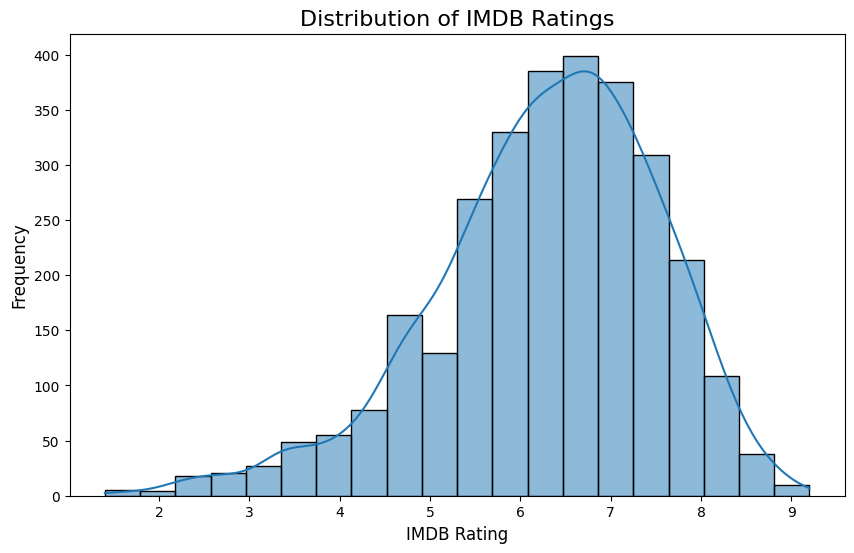

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10,6))

# Create a histogram of movie ratings
sns.histplot(movies_data['IMDB_Rating'].dropna(), bins=20, kde=True)

# Set plot title and labels
plt.title('Distribution of IMDB Ratings', fontsize=16)
plt.xlabel('IMDB Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


Average IMDB Rating by Genre

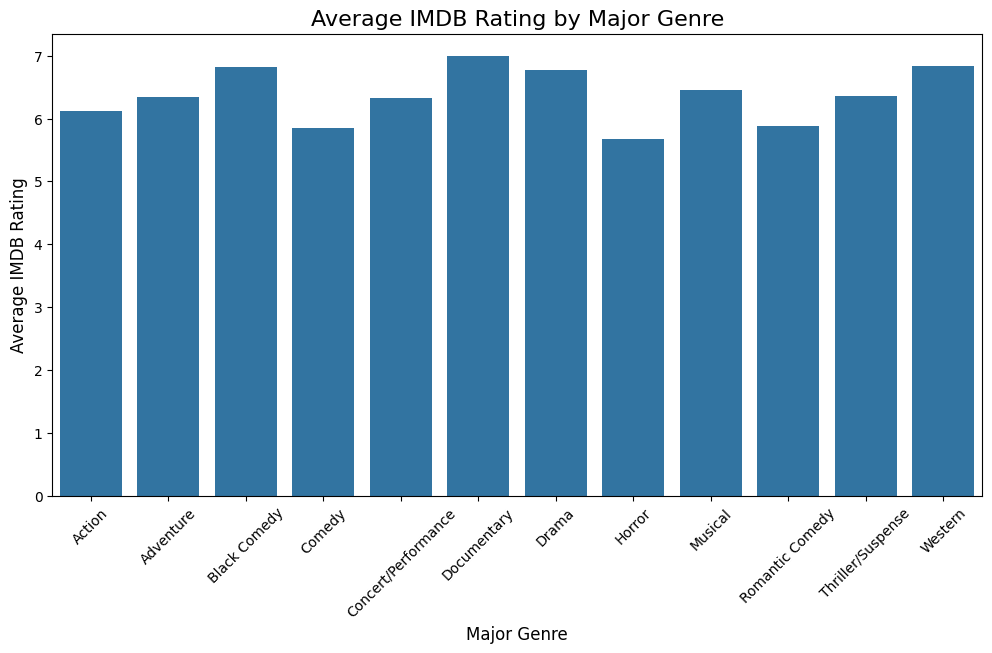

In [ ]:
# Group by Genre and calculate the mean IMDB rating
genre_ratings = movies_data.groupby('Major_Genre')['IMDB_Rating'].mean().dropna()

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values)

# Add titles and labels
plt.title('Average IMDB Rating by Major Genre', fontsize=16)
plt.xlabel('Major Genre', fontsize=12)
plt.ylabel('Average IMDB Rating', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Box Plot

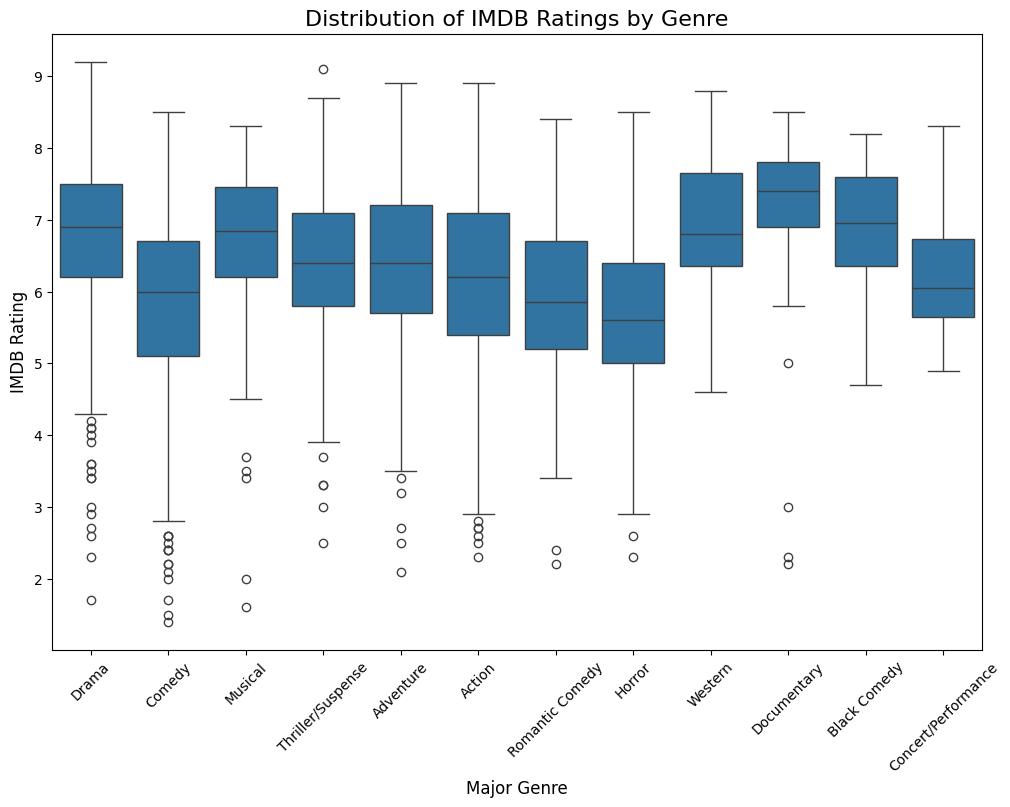

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a box plot to show the distribution of IMDB ratings by genre
sns.boxplot(x='Major_Genre', y='IMDB_Rating', data=movies_data)

# Add a title and labels
plt.title('Distribution of IMDB Ratings by Genre', fontsize=16)
plt.xlabel('Major Genre', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


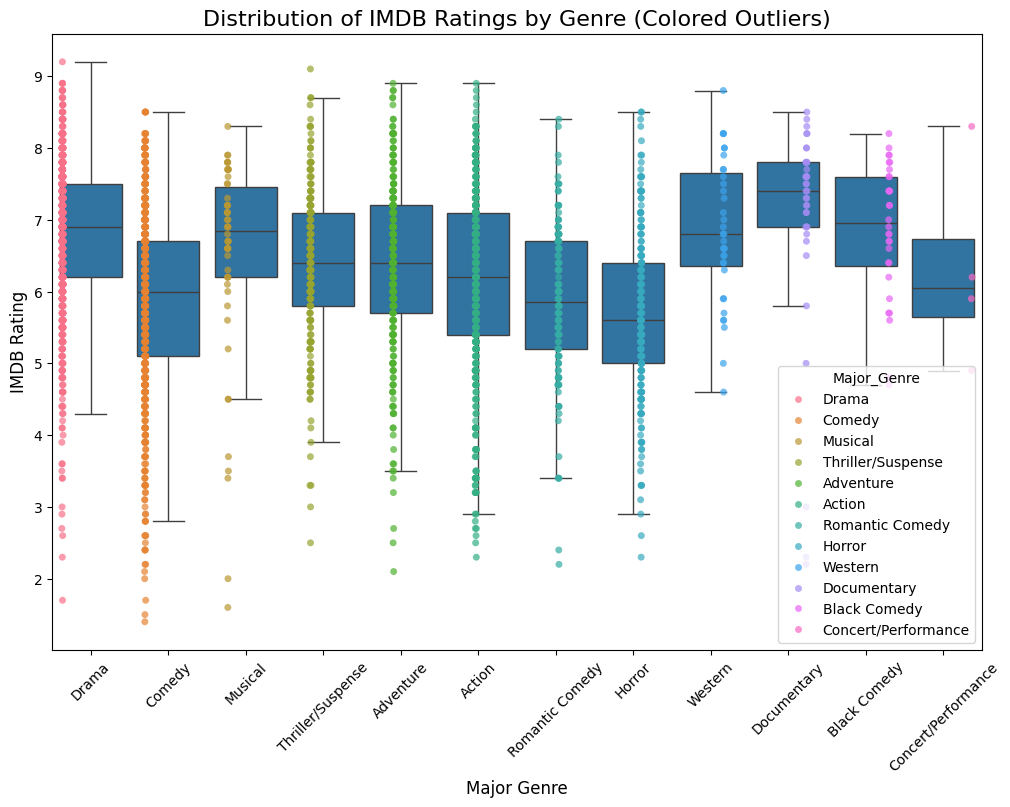

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the base box plot (without showing fliers/outliers)
sns.boxplot(x='Major_Genre', y='IMDB_Rating', data=movies_data, showfliers=False)

# Overlay a scatter plot to color the outliers by 'Major_Genre'
sns.stripplot(x='Major_Genre', y='IMDB_Rating', data=movies_data, hue='Major_Genre',
              dodge=True, jitter=True, marker='o', alpha=0.7)

# Add a title and labels
plt.title('Distribution of IMDB Ratings by Genre (Colored Outliers)', fontsize=16)
plt.xlabel('Major Genre', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Heatmap

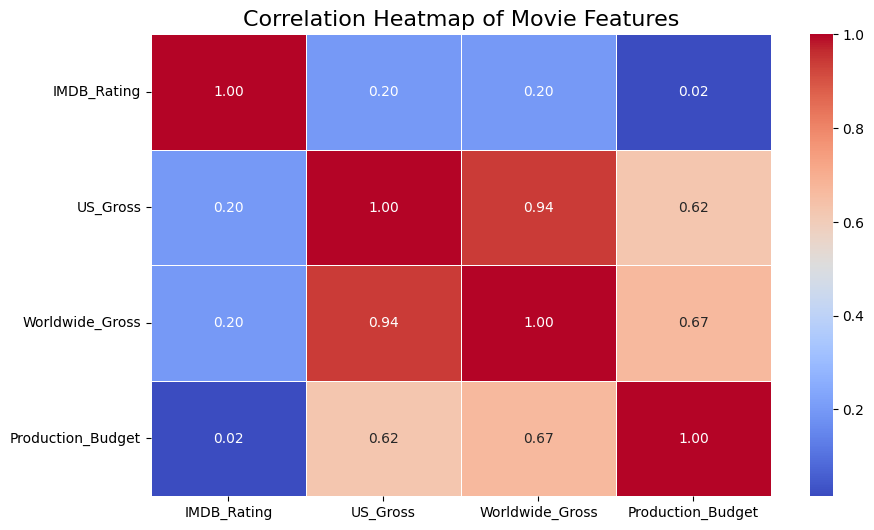

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical columns in the dataset
correlation_matrix = movies_data[['IMDB_Rating', 'US_Gross', 'Worldwide_Gross', 'Production_Budget']].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add a title
plt.title('Correlation Heatmap of Movie Features', fontsize=16)

# Show the plot
plt.show()


In [ ]:
# Show the column names and types
movies_data.dtypes


,0
Title,object
US_Gross,float64
Worldwide_Gross,float64
US_DVD_Sales,float64
Production_Budget,float64
Release_Date,object
MPAA_Rating,object
Running_Time_min,float64
Distributor,object
Source,object


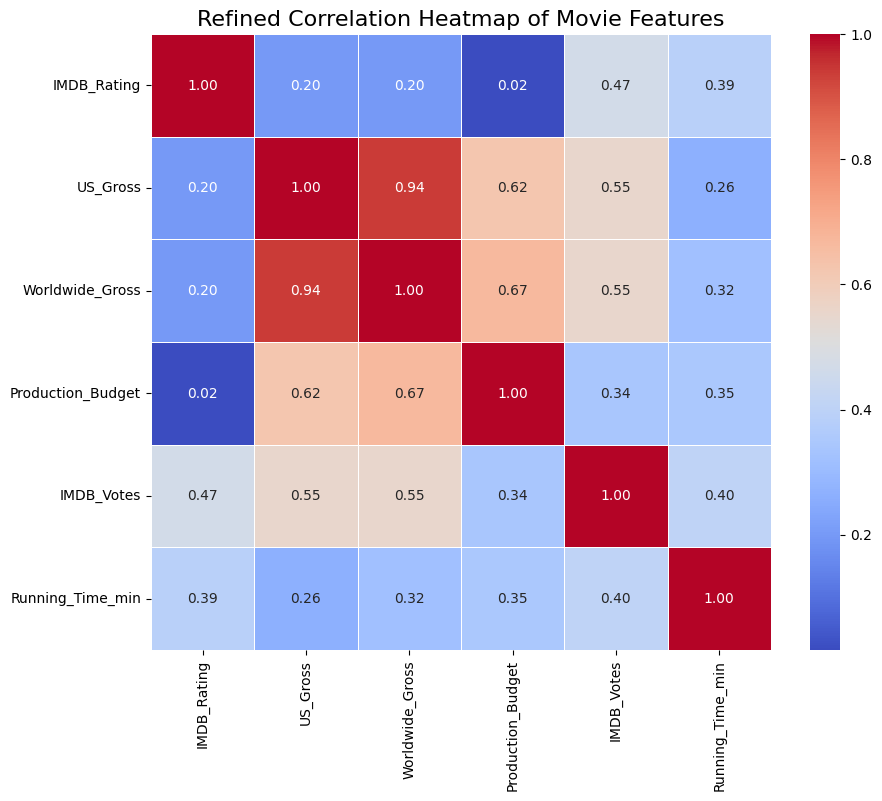

In [ ]:
# Updated correlation matrix with additional numeric columns
correlation_matrix = movies_data[['IMDB_Rating', 'US_Gross', 'Worldwide_Gross', 'Production_Budget', 'IMDB_Votes', 'Running_Time_min']].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add a title
plt.title('Refined Correlation Heatmap of Movie Features', fontsize=16)

# Show the plot
plt.show()


# Line Plots

In [ ]:
# Print the column names to verify the exact names
print(movies_data.columns)



Index(['Title', 'US_Gross', 'Worldwide_Gross', 'US_DVD_Sales',
       'Production_Budget', 'Release_Date', 'MPAA_Rating', 'Running_Time_min',
       'Distributor', 'Source', 'Major_Genre', 'Creative_Type', 'Director',
       'Rotten_Tomatoes_Rating', 'IMDB_Rating', 'IMDB_Votes'],
      dtype='object')


<ipython-input-69-8f0e869364f7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_clean['Release_Year'] = pd.to_datetime(movies_data_clean['Release_Date']).dt.year


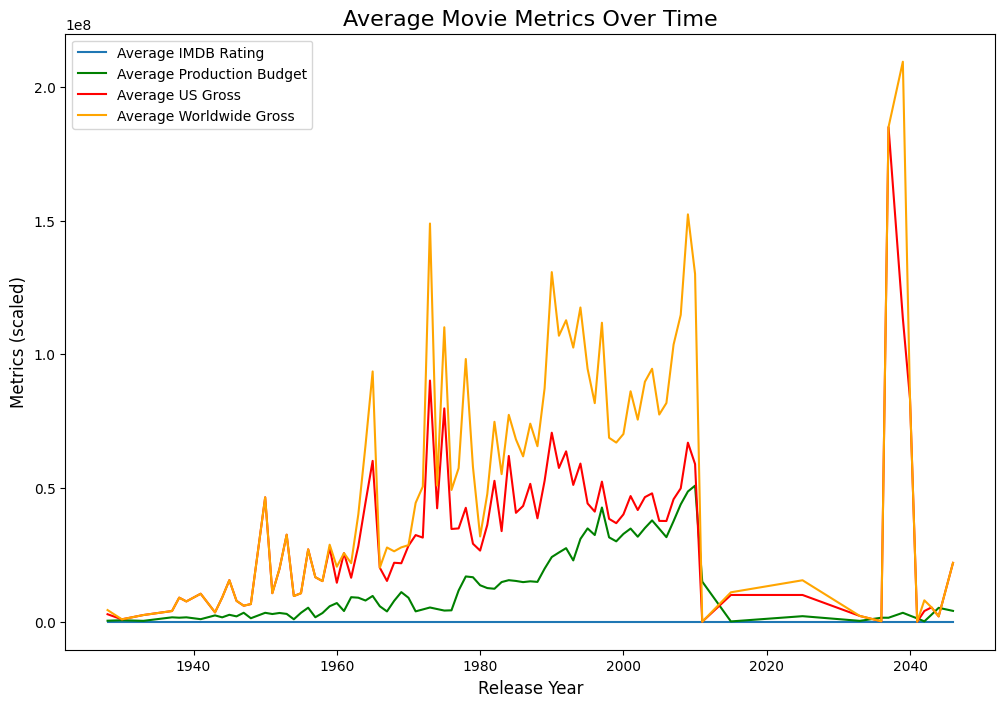

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Remove rows with missing 'Release_Date' and relevant metrics
movies_data_clean = movies_data.dropna(subset=['Release_Date', 'IMDB_Rating', 'Production_Budget', 'US_Gross', 'Worldwide_Gross'])

# Convert 'Release_Date' to datetime format and extract the year
movies_data_clean['Release_Year'] = pd.to_datetime(movies_data_clean['Release_Date']).dt.year

# Group the data by 'Release_Year' and calculate the average of each metric
metrics_per_year = movies_data_clean.groupby('Release_Year').agg({
    'IMDB_Rating': 'mean',
    'Production_Budget': 'mean',
    'US_Gross': 'mean',
    'Worldwide_Gross': 'mean'
}).reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot each metric over time
sns.lineplot(x='Release_Year', y='IMDB_Rating', data=metrics_per_year, label='Average IMDB Rating')
sns.lineplot(x='Release_Year', y='Production_Budget', data=metrics_per_year, label='Average Production Budget', color='green')
sns.lineplot(x='Release_Year', y='US_Gross', data=metrics_per_year, label='Average US Gross', color='red')
sns.lineplot(x='Release_Year', y='Worldwide_Gross', data=metrics_per_year, label='Average Worldwide Gross', color='orange')

# Add titles and labels
plt.title('Average Movie Metrics Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Metrics (scaled)', fontsize=12)

# Show the legend
plt.legend()

# Show the plot
plt.show()


Explanation:
Filter Future Dates:
The line:
movies_data_clean = movies_data_clean[movies_data_clean['Release_Year'] <= 2024]
ensuring that exclude any movies that have a Release_Year in the future, which shouldn't be in the dataset.

Visualization Refinement:
This will make the visualization more realistic by removing the future Release_Year, because it could be incorrect future dates.

<ipython-input-70-9b5e00c9c9ea>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_clean['Release_Year'] = pd.to_datetime(movies_data_clean['Release_Date']).dt.year


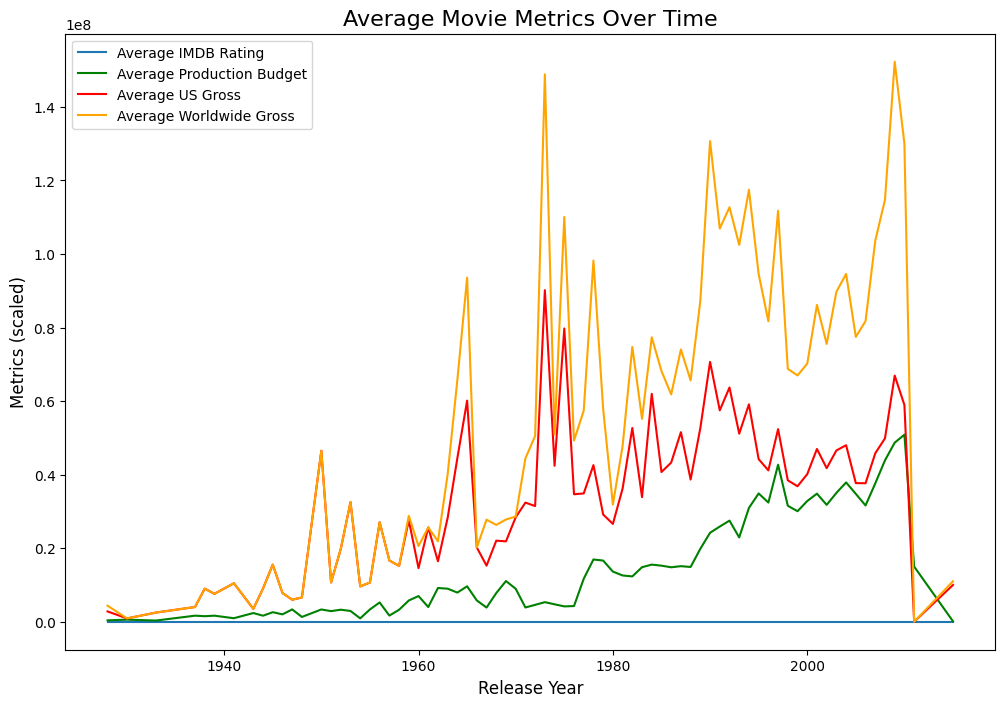

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Remove rows with missing 'Release_Date' and relevant metrics
movies_data_clean = movies_data.dropna(subset=['Release_Date', 'IMDB_Rating', 'Production_Budget', 'US_Gross', 'Worldwide_Gross'])

# Convert 'Release_Date' to datetime format and extract the year
movies_data_clean['Release_Year'] = pd.to_datetime(movies_data_clean['Release_Date']).dt.year

# Filter out rows where the release year is greater than the current year (2024)
movies_data_clean = movies_data_clean[movies_data_clean['Release_Year'] <= 2024]

# Group the data by 'Release_Year' and calculate the average of each metric
metrics_per_year = movies_data_clean.groupby('Release_Year').agg({
    'IMDB_Rating': 'mean',
    'Production_Budget': 'mean',
    'US_Gross': 'mean',
    'Worldwide_Gross': 'mean'
}).reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot each metric over time
sns.lineplot(x='Release_Year', y='IMDB_Rating', data=metrics_per_year, label='Average IMDB Rating')
sns.lineplot(x='Release_Year', y='Production_Budget', data=metrics_per_year, label='Average Production Budget', color='green')
sns.lineplot(x='Release_Year', y='US_Gross', data=metrics_per_year, label='Average US Gross', color='red')
sns.lineplot(x='Release_Year', y='Worldwide_Gross', data=metrics_per_year, label='Average Worldwide Gross', color='orange')

# Add titles and labels
plt.title('Average Movie Metrics Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Metrics (scaled)', fontsize=12)

# Show the legend
plt.legend()

# Show the plot
plt.show()


# Hexbin Plot of Production Budget vs. Worldwide Gross

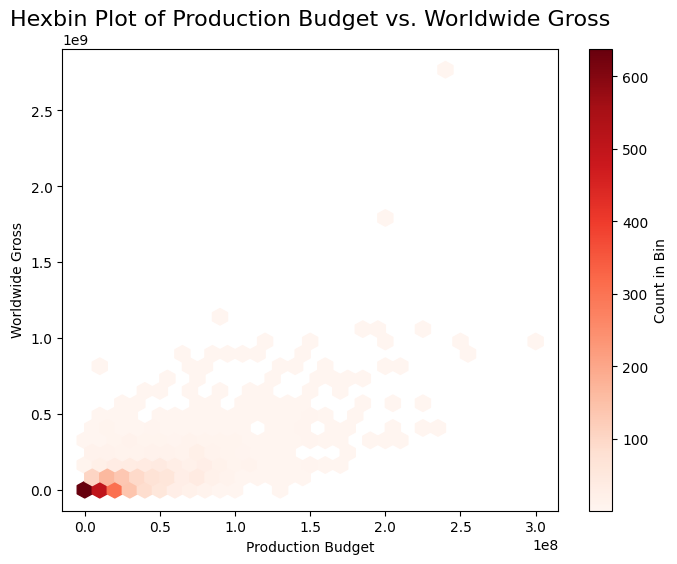

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Remove rows with missing 'Production_Budget' or 'Worldwide_Gross'
movies_data_clean = movies_data.dropna(subset=['Production_Budget', 'Worldwide_Gross'])

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a hexbin plot
plt.hexbin(movies_data_clean['Production_Budget'], movies_data_clean['Worldwide_Gross'], gridsize=30, cmap='Reds', mincnt=1)

# Add color bar to show the density scale
plt.colorbar(label='Count in Bin')

# Add titles and labels
plt.title('Hexbin Plot of Production Budget vs. Worldwide Gross', fontsize=16)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')

# Show the plot
plt.show()



# Hexbin Plot of IMDB Rating vs. Worldwide Gross

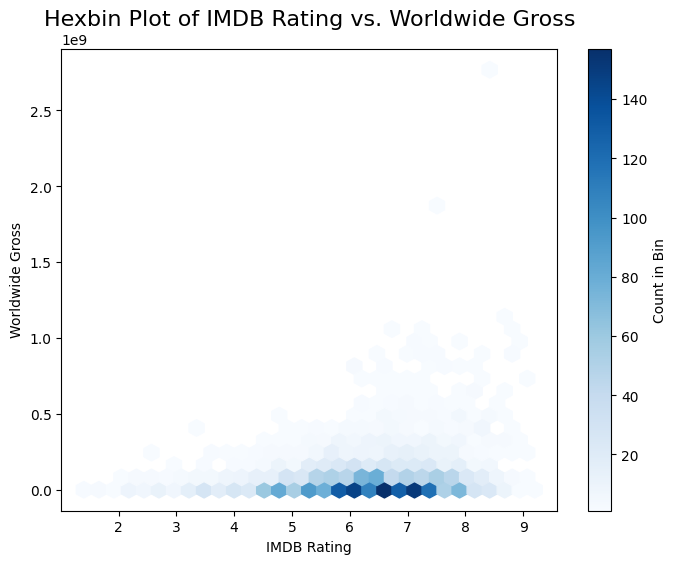

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Remove rows with missing 'IMDB_Rating' or 'Worldwide_Gross'
movies_data_clean = movies_data.dropna(subset=['IMDB_Rating', 'Worldwide_Gross'])

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a hexbin plot for IMDB Rating vs. Worldwide Gross
plt.hexbin(movies_data_clean['IMDB_Rating'], movies_data_clean['Worldwide_Gross'], gridsize=30, cmap='Blues', mincnt=1)

# Add color bar to show the density scale
plt.colorbar(label='Count in Bin')

# Add titles and labels
plt.title('Hexbin Plot of IMDB Rating vs. Worldwide Gross', fontsize=16)
plt.xlabel('IMDB Rating')
plt.ylabel('Worldwide Gross')

# Show the plot
plt.show()


# Hexbin Plot of IMDB Rating vs. US Gross

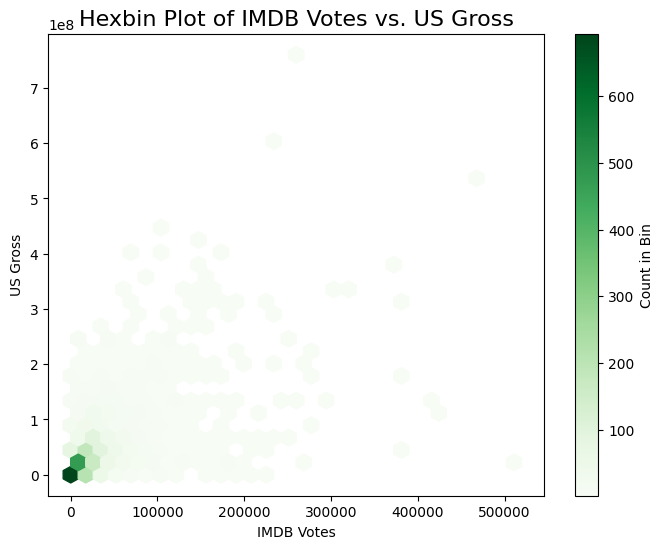

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Remove rows with missing 'IMDB_Rating' or 'Worldwide_Gross'
movies_data_clean = movies_data.dropna(subset=['IMDB_Votes', 'US_Gross'])

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a hexbin plot for IMDB Rating vs. Worldwide Gross
plt.hexbin(movies_data_clean['IMDB_Votes'], movies_data_clean['US_Gross'], gridsize=30, cmap='Greens', mincnt=1)

# Add color bar to show the density scale
plt.colorbar(label='Count in Bin')

# Add titles and labels
plt.title('Hexbin Plot of IMDB Votes vs. US Gross', fontsize=16)
plt.xlabel('IMDB Votes')
plt.ylabel('US Gross')

# Show the plot
plt.show()







# Pair Plot

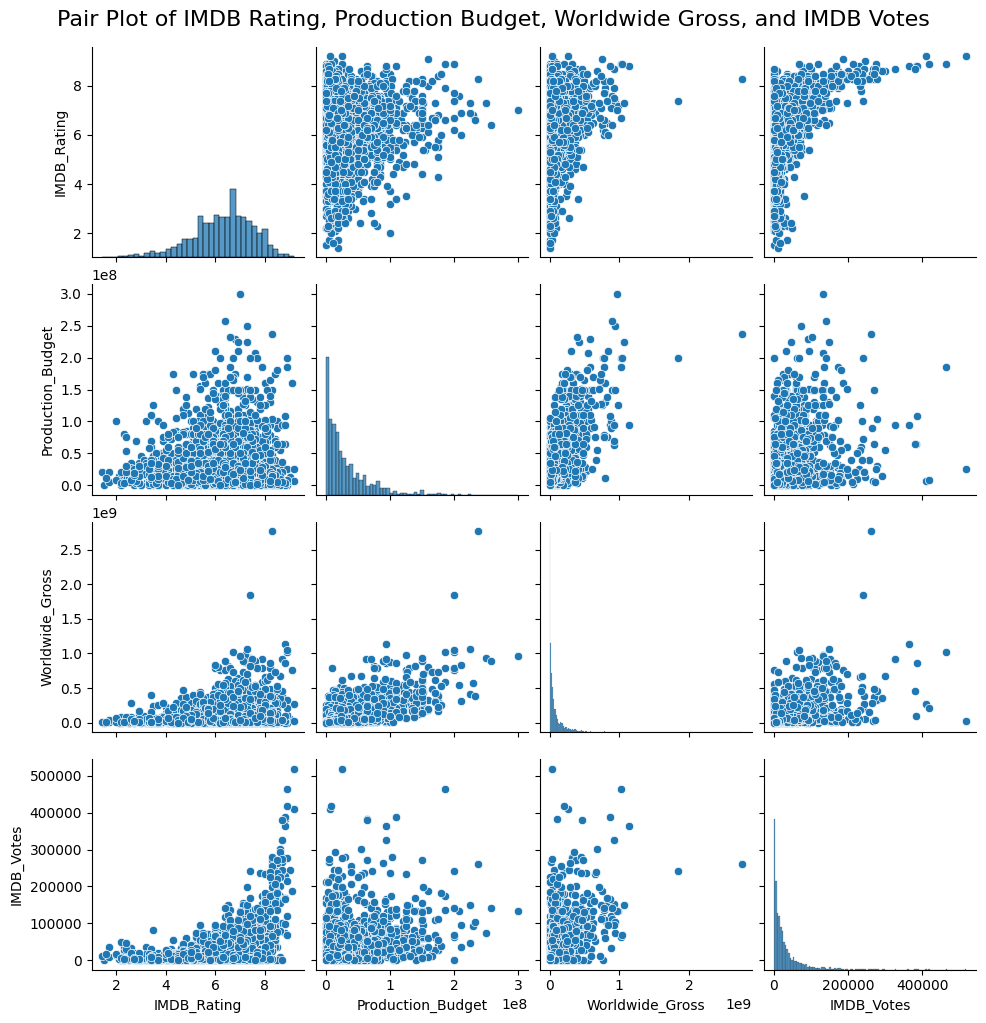

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows with missing values for selected metrics
movies_data_clean = movies_data.dropna(subset=['IMDB_Rating', 'Production_Budget', 'Worldwide_Gross', 'IMDB_Votes'])

# Select the metrics you want to compare
metrics = movies_data_clean[['IMDB_Rating', 'Production_Budget', 'Worldwide_Gross', 'IMDB_Votes']]

# Create a pair plot to compare multiple metrics
sns.pairplot(metrics)

# Add a title (you can only do this after the plot, since pairplot returns a grid)
plt.suptitle('Pair Plot of IMDB Rating, Production Budget, Worldwide Gross, and IMDB Votes', y=1.02, fontsize=16)

# Show the plot
plt.show()


# PairGrid with Hexbins and Scatter Plots

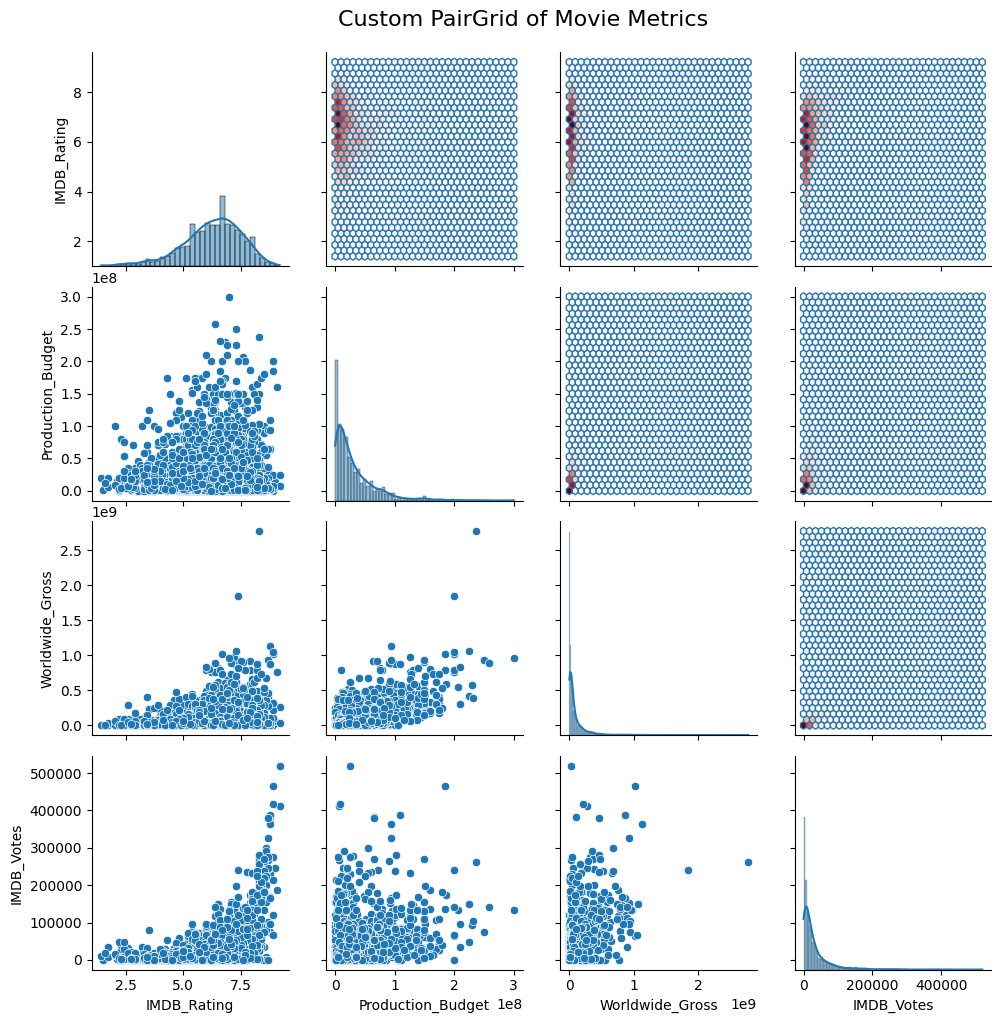

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows with missing values for selected metrics
movies_data_clean = movies_data.dropna(subset=['IMDB_Rating', 'Production_Budget', 'Worldwide_Gross', 'IMDB_Votes'])

# Select the metrics you want to compare
metrics = movies_data_clean[['IMDB_Rating', 'Production_Budget', 'Worldwide_Gross', 'IMDB_Votes']]

# Create a PairGrid and map different types of plots
g = sns.PairGrid(metrics)
g.map_upper(plt.hexbin, gridsize=30, cmap="Reds")
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)

# Add a title (adjust the y value to move it above the plot)
plt.suptitle('Custom PairGrid of Movie Metrics', y=1.02, fontsize=16)

# Show the plot
plt.show()
